In [1]:
import pandas as pd

from pathlib import Path
import pandas as pd
import music21 as m21
import pretty_midi as pm
from  matplotlib import pyplot as plt
import seaborn as sns
# import LibFMP.B
# import LibFMP.C2
# import LibFMP.C6
%matplotlib inline
import numpy as np
import math
import pandas as pd
import librosa
import soundfile
from collections import Counter
import pickle

import json

import IPython.display as ipd

BASE_PATH = Path("../")
MAESTRO_PATH = Path("D:\\maestro-v2.0.0\\maestro-v2.0.0")
BALLROOM_PATH = Path("C:\\Users\\fosca\\Desktop\\CNAM\\BallroomAnnotations-master")
OTHER_DATASET_PATH = Path("C:\\Users\\fosca\\Desktop\\CNAM\\dataset paper\\Other datasets")

In [2]:
all_df = pd.read_csv(Path(BASE_PATH,"metadata.csv"))

In [14]:
def is_manually_corrected(row):
    #check based on the audio click files
    if Path(BASE_PATH,row["midi_performance"][:-4]+ "_click.wav").exists():
        return False
    else:
        return True
        
def has_single_ts(row):
    ann_df = pd.read_csv(Path(BASE_PATH,row["performance_annotations"]),header=None, names=["time","time2","type"],sep='\t')
    cleaned_type = [t if t[-1]!= "W" else t[:-1] for t in ann_df["type"] ]
    ts = [t.split(",")[1] for t in cleaned_type if (len(t.split(","))>=2 and t.split(",")[1]!="" )]
    return len(ts)==1
    

#update depending on what is manually checked
all_df["manually_corrected"] = all_df.apply(is_manually_corrected,axis=1)
all_df["has_single_ts"] = all_df.apply(has_single_ts,axis=1)

In [28]:
all_df

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance,manually_corrected,has_single_ts
0,Bach,Fugue_bwv_846,Bach/Fugue/bwv_846,Bach/Fugue/bwv_846/xml_score.musicxml,Bach/Fugue/bwv_846/midi_score.mid,Bach/Fugue/bwv_846/Shi05M.mid,Bach/Fugue/bwv_846/Shi05M_annotations.txt,Bach/Fugue/bwv_846/midi_score_annotations.txt,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,144.567708,NaN,Bach/Fugue/bwv_846/Shi05M.wav,True,True
1,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Denisova06M.mid,Bach/Fugue/bwv_848/Denisova06M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,69.317708,NaN,Bach/Fugue/bwv_848/Denisova06M.wav,True,True
2,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lee01M.mid,Bach/Fugue/bwv_848/Lee01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,74.795573,NaN,Bach/Fugue/bwv_848/Lee01M.wav,True,True
3,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/LeeSH01M.mid,Bach/Fugue/bwv_848/LeeSH01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,83.644792,NaN,Bach/Fugue/bwv_848/LeeSH01M.wav,True,True
4,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lin04M.mid,Bach/Fugue/bwv_848/Lin04M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,75.373698,NaN,Bach/Fugue/bwv_848/Lin04M.wav,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Na03.mid,Scriabin/Sonatas/5/Na03_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN,True,False
1064,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Na07M.mid,Scriabin/Sonatas/5/Na07M_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,NaN,NaN,Scriabin/Sonatas/5/Na07M.wav,True,False
1065,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/TET02.mid,Scriabin/Sonatas/5/TET02_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN,True,False
1066,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Yeletskiy02.mid,Scriabin/Sonatas/5/Yeletskiy02_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN,True,False


# Beats and downbeats sequences

In [16]:
def get_beats(annotation_path):
    ann_df = pd.read_csv(Path(BASE_PATH,annotation_path),header=None, names=["time","time2","type"],sep='\t')
    return ann_df["time"].tolist()

def norm_by_max(values):
    return [np.round(x / max(values), 3) for x in values]
    
def plot_beat_interval(annotation_path, normalize = True):
    plt.figure(figsize=(18, 6), dpi= 80)
#     plt.subplot(211)
    
    beats = get_beats(annotation_path)
    
    if normalize:
        plt.plot(range(len(beats)-1), norm_by_max(np.diff(beats)))
    else:
        plt.plot(range(len(beats)-1), np.diff(beats))
#     plt.xticks([int(v[0]) for v in [*pianist.markings.values()]], 
#                [m.split('.')[0] for m in list(pianist.markings.keys())], rotation='vertical', fontsize=12) 

    plt.title('Inter-beat-intervals', fontsize=14)
    plt.xlabel('Beats', fontsize=14)
    plt.ylabel('IBIs (normalised)', fontsize=14)

#     plt.subplot(212)
#     for pianist in M_info_pianist:
#         plt.plot(range(len(pianist.dyn)), pianist.dyn)
#         plt.xticks([int(v[0]) for v in [*pianist.markings.values()]], 
#                    [m.split('.')[0] for m in list(pianist.markings.keys())], rotation='vertical', fontsize=12) 

#     plt.title('Dynamics per score beat in Mazurka recording', fontsize=14)
#     plt.xlabel('Score beats', fontsize=14)
#     plt.ylabel('Dynamics in smoothed sones (normalised)', fontsize=12)
    plt.tight_layout()

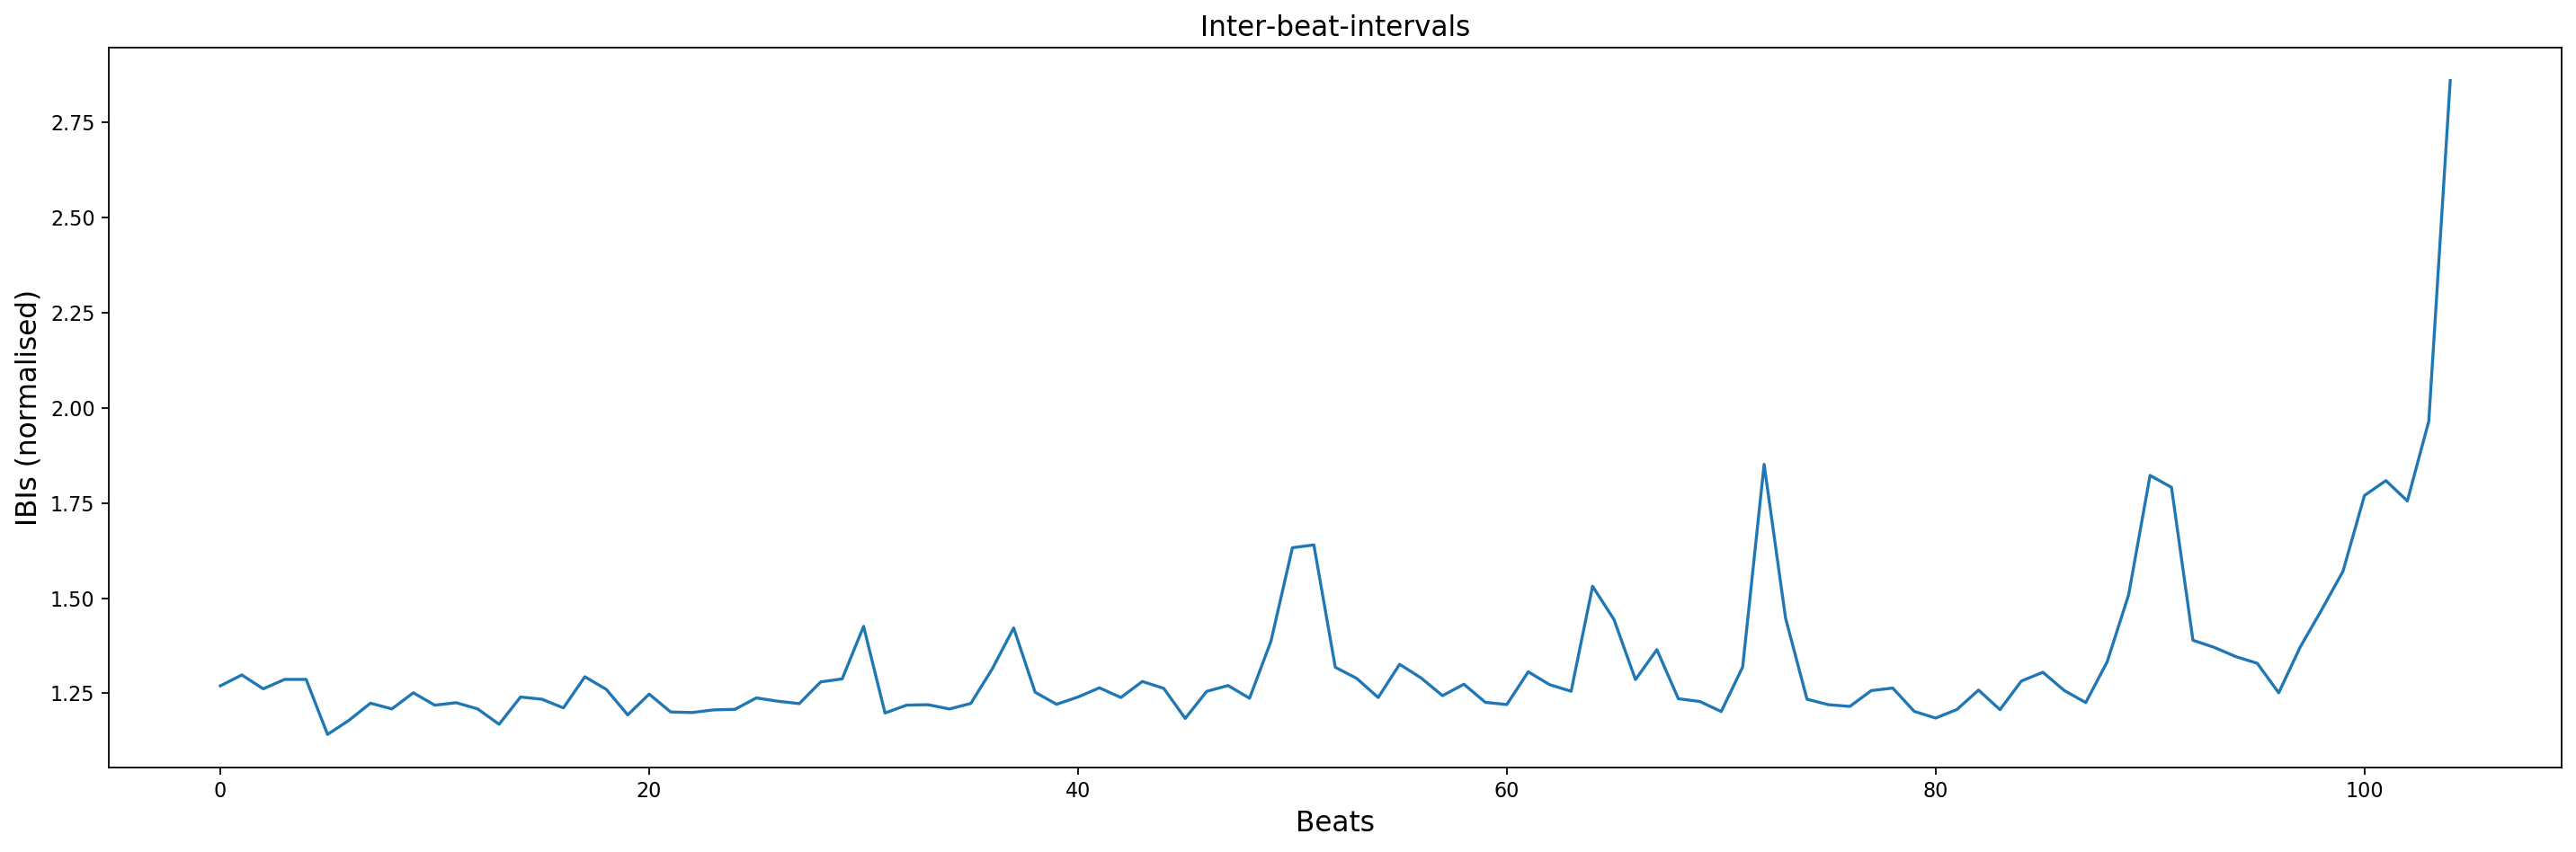

In [31]:
row = all_df.loc[0]
plot_beat_interval(row["performance_annotations"],normalize= False)

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'inter beat interval')]

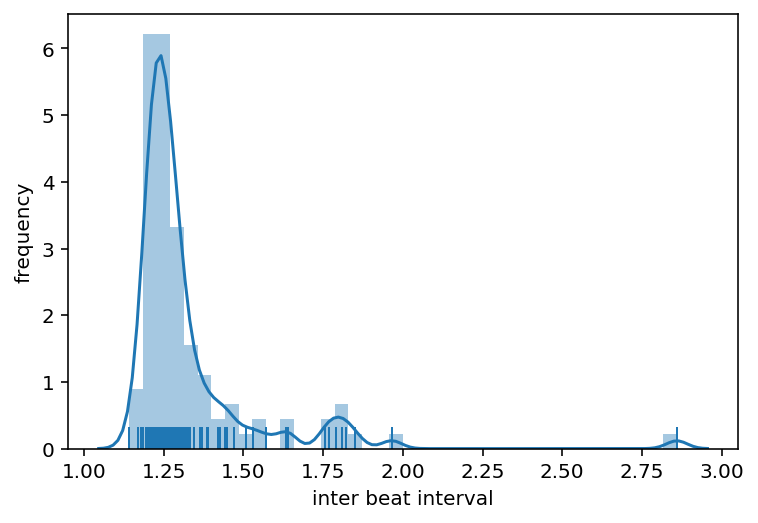

In [32]:
row = all_df.loc[0]
inter_beat_intervals = np.diff(get_beats(row["performance_annotations"]))
ax = sns.distplot(inter_beat_intervals,rug=True)
ax.set(xlabel='inter beat interval', ylabel='frequency')

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'BPM')]

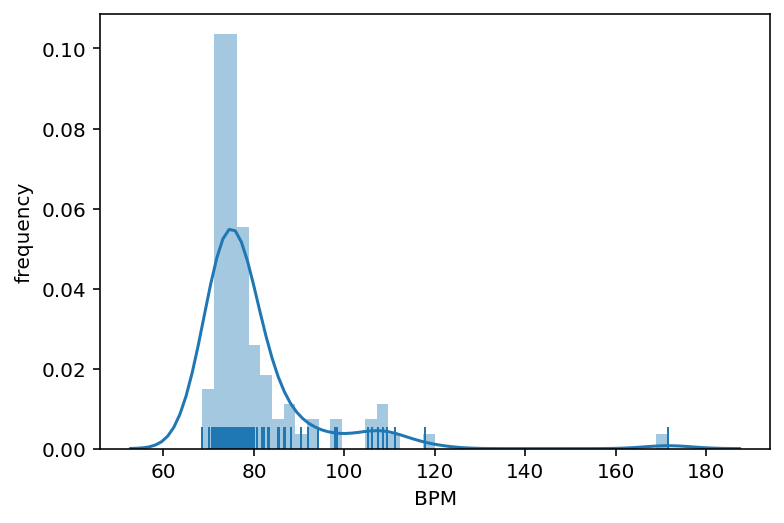

In [39]:
row = all_df.loc[0]
inter_beat_intervals = np.diff(get_beats(row["performed_annotations_path"]))*60
ax = sns.distplot(inter_beat_intervals,rug=True)
ax.set(xlabel='BPM', ylabel='frequency')

In [ ]:
row1 = all_df.loc[0]
row2 = all_df.loc[]

sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")

In [15]:
# all_df.drop_duplicates(subset=["vnet_composer"], keep='first')
all_df[all_df["vnet_composer"]=="Debussy"]

,Unnamed: 0,vnet_title,vnet_composer,score_xml,score_midi,maestro_midi,start,end,performed_midi_path,performed_annotations_path,same_length
741,748,Images_Book_1_1_Reflets_dans_lEau,Debussy,Debussy/Images_Book_1/1_Reflets_dans_lEau/musi...,Debussy/Images_Book_1/1_Reflets_dans_lEau/midi...,{maestro}/2008/MIDI-Unprocessed_06_R2_2008_01-...,NaN,NaN,Debussy/Images_Book_1/1_Reflets_dans_lEau/Klei...,Debussy/Images_Book_1/1_Reflets_dans_lEau/Klei...,True
742,749,Images_Book_1_1_Reflets_dans_lEau,Debussy,Debussy/Images_Book_1/1_Reflets_dans_lEau/musi...,Debussy/Images_Book_1/1_Reflets_dans_lEau/midi...,{maestro}/2014/MIDI-UNPROCESSED_09-10_R1_2014_...,NaN,300.451823,Debussy/Images_Book_1/1_Reflets_dans_lEau/Park...,Debussy/Images_Book_1/1_Reflets_dans_lEau/Park...,True
743,750,Pour_le_Piano_1,Debussy,Debussy/Pour_le_Piano/1/musicxml_cleaned.musicxml,Debussy/Pour_le_Piano/1/midi_cleaned.mid,{maestro}/2015/MIDI-Unprocessed_R2_D2-12-13-15...,NaN,225.494792,Debussy/Pour_le_Piano/1/MunA12M.mid,Debussy/Pour_le_Piano/1/MunA12M_ann.txt,True


<Figure size 1440x480 with 0 Axes>

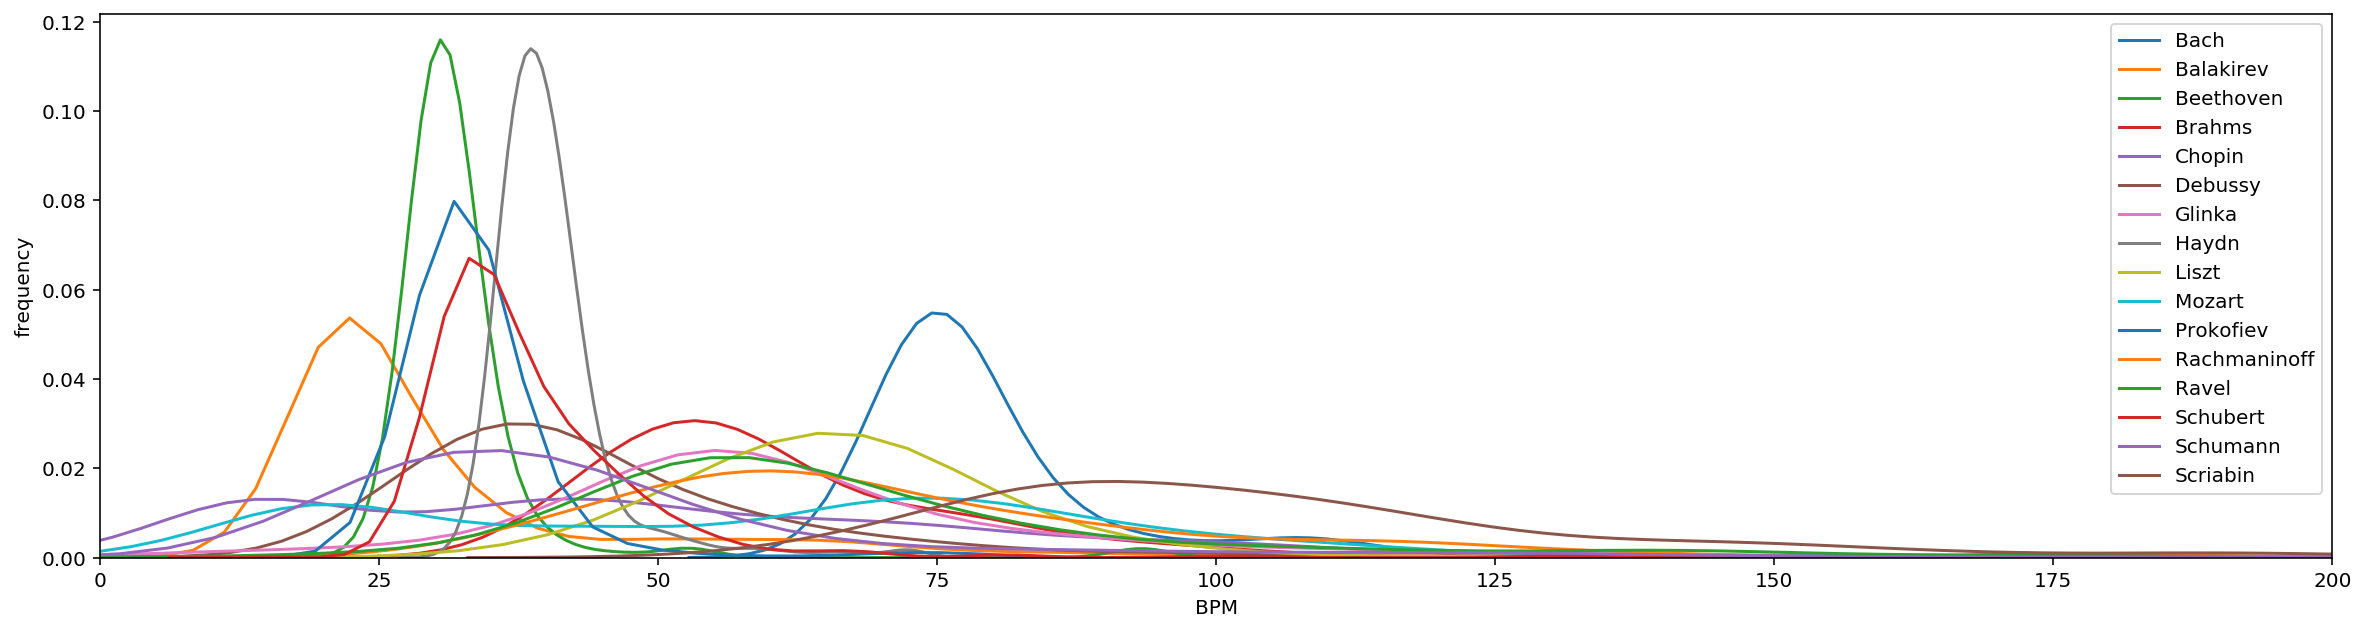

<Figure size 1440x480 with 0 Axes>

In [53]:
plt.figure(figsize=(20,5))

for i, row in all_df.drop_duplicates(subset=["vnet_composer"], keep='first').iterrows():
    inter_beat_intervals = np.diff(get_beats(row["performed_annotations_path"]))*60
    ax = sns.distplot(inter_beat_intervals, hist=False, label=row.vnet_composer)

ax.set(xlabel='BPM', ylabel='frequency', xlim=(0, 200))
plt.figure(figsize=(18, 6), dpi= 80)


[Text(0, 0.5, 'PDF estimate'),
 Text(0.5, 0, 'BPM'),
 Text(0.5, 1.0, 'BPM distribution per composer')]

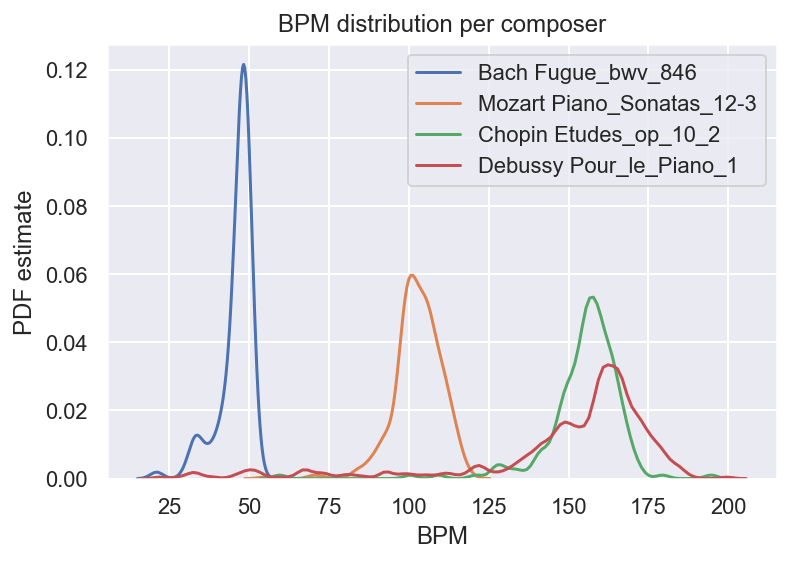

In [28]:
indices= [0,920,550, 743]

sns.set()
# plt.figure(figsize=(7,5))

for i in indices:
    row = all_df.loc[i]
    inter_beat_intervals = np.diff(get_beats(row["performed_annotations_path"]))
    bpm = 60/inter_beat_intervals
#     print(row.vnet_composer)
#     print(get_beats(row["performed_annotations_path"]))
#     ax = sns.distplot(bpm, hist=False, norm_hist= True,  label=row.vnet_composer + " " + row.vnet_title)
    ax = sns.kdeplot(bpm, bw= 2,  label=row.vnet_composer + " " + row.vnet_title)

ax.set(xlabel='BPM', ylabel='PDF estimate', title="BPM distribution per composer")


[Text(0, 0.5, 'beat number'),
 Text(0.5, 0, 'BPM'),
 Text(0.5, 1.0, 'BPM changing during the piece')]

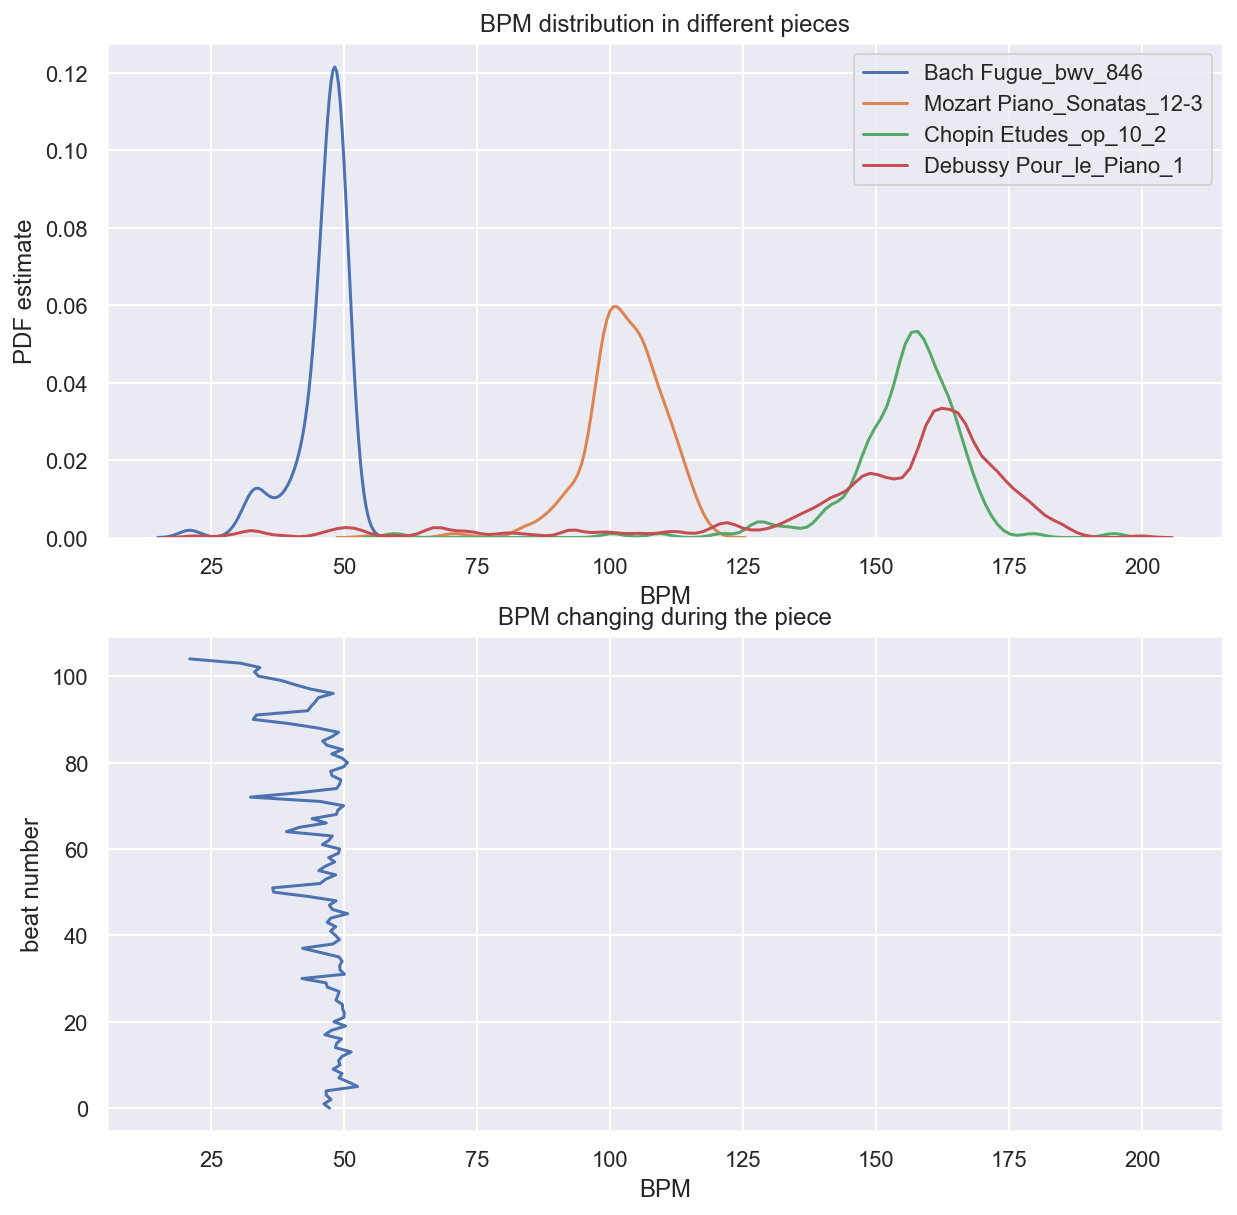

In [39]:
fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)

for i in indices:
    row = all_df.loc[i]
    inter_beat_intervals = np.diff(get_beats(row["performed_annotations_path"]))
    bpm = 60/inter_beat_intervals
#     print(row.vnet_composer)
#     print(get_beats(row["performed_annotations_path"]))
#     ax = sns.distplot(bpm, hist=False, norm_hist= True,  label=row.vnet_composer + " " + row.vnet_title)
    ax = sns.kdeplot(bpm, bw= 2,  label=row.vnet_composer + " " + row.vnet_title)

ax.set(xlabel='BPM', ylabel='PDF estimate', title="BPM distribution in different pieces")

ax2 = plt.subplot(212, sharex = ax1)

row = all_df.loc[indices[0]]
inter_beat_intervals = np.diff(get_beats(row["performed_annotations_path"]))
bpm = 60/inter_beat_intervals
    

plt.plot( bpm,range(len(bpm)))
#     plt.xticks([int(v[0]) for v in [*pianist.markings.values()]], 
#                [m.split('.')[0] for m in list(pianist.markings.keys())], rotation='vertical', fontsize=12) 

ax2.set( ylabel='beat number', xlabel= 'BPM', title="BPM changing during the piece")
# plt.title('Inter-beat-intervals', fontsize=14)
# plt.xlabel('Beats', fontsize=14)
# plt.ylabel('IBIs (normalised)', fontsize=14)


# Tempo Deviation

In [33]:
ballroom_deviation = []
for txt_file in BALLROOM_PATH.glob('*.beats'):
    try:
        ann_df = pd.read_csv(txt_file,header=None, names=["time","type"],sep=' ')
        ibi = np.diff(ann_df["time"])
        tempo_deviation = np.diff(ibi)
        ballroom_deviation.append(np.std(tempo_deviation))
    except:
        print("Failed for", txt_file)

Failed for C:\Users\fosca\Desktop\CNAM\BallroomAnnotations-master\Media-103801.beats


In [27]:
asap_deviation = []
for i,row in all_df[all_df["manually_corrected"]==True].iterrows():
    ibi = np.diff(get_beats(row["performed_annotations_path"]))
    tempo_deviation = np.diff(ibi)
    asap_deviation.append(np.std(tempo_deviation))

asap_deviation

[0.1479561619886533,
 0.03386501015073544,
 0.03928188327808991,
 0.06042980930273925,
 0.03674181971173399,
 0.05188185188796472,
 0.07425785856168804,
 0.04990202012023753,
 0.03983582158138344,
 0.039426599665256995,
 0.03939324775097565,
 0.049753250578398515,
 0.03449982292725822,
 0.058651456373118346,
 0.046132976121730486,
 0.05098125814525149,
 0.09537703458928894,
 0.16006012479802814,
 0.11996451425954457,
 0.1546355546274195,
 0.11156838796297187,
 0.1179482077903682,
 0.0808431999970194,
 0.08616867190397935,
 0.052849779990170334,
 0.08193382234819274,
 0.0932545867439809,
 0.1059014841054022,
 0.120270114671287,
 0.06742823770305377,
 0.10228471475034578,
 0.060817313386550914,
 0.06482020194091631,
 0.08707148124579,
 0.08024273236876898,
 0.11999194903620929,
 0.14435063896532122,
 0.06675290677954113,
 0.059620163737557685,
 0.07357868494773603,
 0.07067608482695914,
 0.10341201653216034,
 0.05687465362650046,
 0.02949349485568489,
 0.042302607741419564,
 0.0291217349

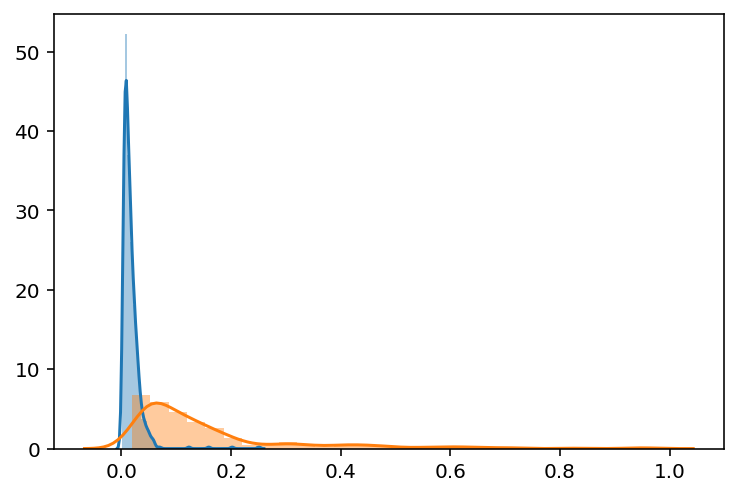

In [30]:
sns.distplot(ballroom_deviation, norm_hist= True)
sns.distplot(asap_deviation,norm_hist= True )

Failed for C:\Users\fosca\Desktop\CNAM\BallroomAnnotations-master\Media-103801.beats


Text(0, 0.5, 'Density')

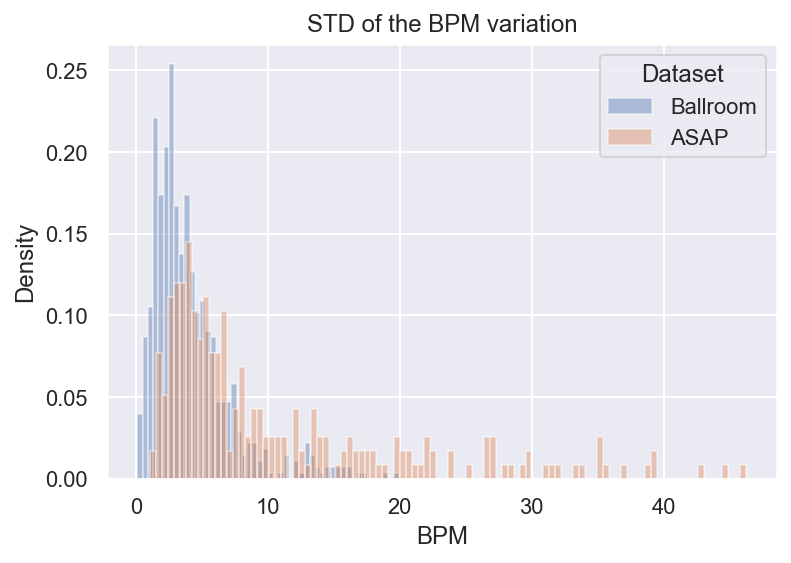

In [105]:
sns.set()

ballroom_bpm_deviation = []
for txt_file in BALLROOM_PATH.glob('*.beats'):
    try:
        ann_df = pd.read_csv(txt_file,header=None, names=["time","type"],sep=' ')
        ibis = np.diff(ann_df["time"])
        bpm= 60/ibis
        bpm_deviation = np.diff(bpm)
        std = np.std(bpm_deviation)
        if std<50:
            ballroom_bpm_deviation.append(std)
    except:
        print("Failed for", txt_file)
        
asap_bpm_deviation = []
for i,row in all_df.loc[all_df["manually_corrected"] & all_df["has_single_ts"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performed_annotations_path"]))
    bpm= 60/ibis
    bpm_deviation = np.diff(bpm)
    std = np.std(bpm_deviation)
    if std<50:
        asap_bpm_deviation.append(std)

palette= sns.color_palette()
        
sns.distplot(ballroom_bpm_deviation, norm_hist= True,kde=False, label= "Ballroom", hist = True, bins=50,color=palette[0])
# sns.kdeplot(ballroom_bpm_deviation,bw=0.8,color=palette[0])
ax  = sns.distplot(asap_bpm_deviation,norm_hist= True,kde=False, label = "ASAP", hist = True, bins = 100 ,color=palette[1])
# sns.kdeplot(asap_bpm_deviation,bw=0.8,color=palette[1])

# ax.set(xlim= (-5,50))
# ax.set(xlabel='BPM', ylabel='Density function', title="STD of the BPM variation")
plt.legend(title = 'Dataset')
plt.title('STD of the BPM variation')
plt.xlabel('BPM')
plt.ylabel('Density')
# plt.xlim(0)

In [78]:
all_df[all_df["score_midi"]== "Schubert/Impromptu_op142/3/midi_cleaned.mid"]

,Unnamed: 0,vnet_title,vnet_composer,score_xml,score_midi,maestro_midi,start,end,performed_midi_path,performed_annotations_path,same_length,manually_corrected,has_single_ts
997,1019,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,NaN,NaN,NaN,Schubert/Impromptu_op142/3/Cui04.mid,Schubert/Impromptu_op142/3/Cui04_ann_cleaned.txt,True,True,True
998,1020,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,NaN,NaN,9.902344,Schubert/Impromptu_op142/3/Lin05.mid,Schubert/Impromptu_op142/3/Lin05_ann_cleaned.txt,True,True,True
999,1021,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,{maestro}/2013/ORIG-MIDI_02_7_8_13_Group__MID-...,NaN,NaN,Schubert/Impromptu_op142/3/Richardson07M.mid,Schubert/Impromptu_op142/3/Richardson07M_ann_c...,True,True,True
1000,1022,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,{maestro}/2015/MIDI-Unprocessed_R2_D1-2-3-6-7-...,NaN,NaN,Schubert/Impromptu_op142/3/RichardsonC06M.mid,Schubert/Impromptu_op142/3/RichardsonC06M_ann_...,True,True,True
1001,1023,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,{maestro}/2017/MIDI-Unprocessed_080_PIANO080_M...,NaN,NaN,Schubert/Impromptu_op142/3/SunY08M.mid,Schubert/Impromptu_op142/3/SunY08M_ann_cleaned...,False,True,True
1002,1024,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,NaN,NaN,NaN,Schubert/Impromptu_op142/3/Tuncali02.mid,Schubert/Impromptu_op142/3/Tuncali02_ann_clean...,True,True,True
1003,1025,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,{maestro}/2017/MIDI-Unprocessed_074_PIANO074_M...,NaN,NaN,Schubert/Impromptu_op142/3/WangH06M.mid,Schubert/Impromptu_op142/3/WangH06M_ann_cleane...,True,True,True
1004,1026,Impromptu_op142_3,Schubert,Schubert/Impromptu_op142/3/musicxml_cleaned.mu...,Schubert/Impromptu_op142/3/midi_cleaned.mid,{maestro}/2015/MIDI-Unprocessed_R2_D2-19-21-22...,NaN,NaN,Schubert/Impromptu_op142/3/YoungS06M.mid,Schubert/Impromptu_op142/3/YoungS06M_ann_clean...,True,True,True


No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

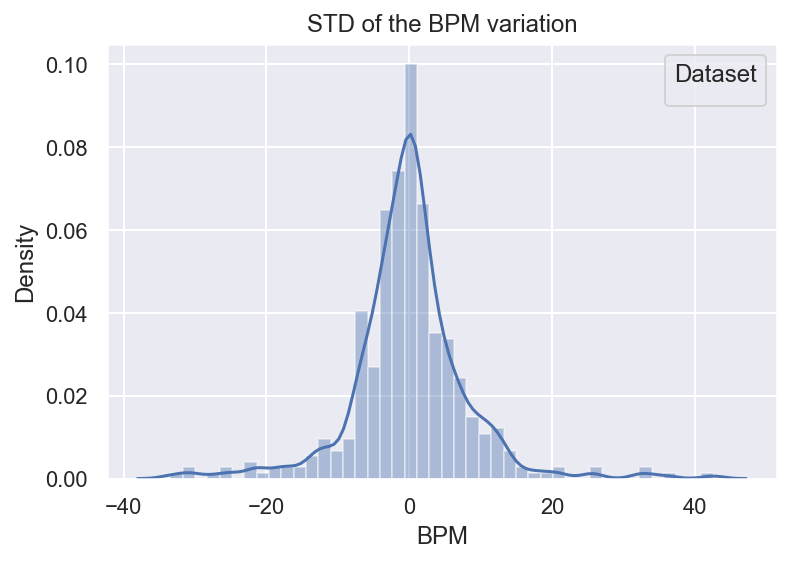

In [83]:
row = all_df.loc[1004]
ibis = np.diff(get_beats(row["performed_annotations_path"]))
bpm= 60/ibis
bpm_deviation = np.diff(bpm)
std = np.std(bpm_deviation)
if std<50:
    asap_bpm_deviation.append(std)


ax  = sns.distplot(bpm_deviation,norm_hist= True)

# ax.set(xlim= (-5,50))
# ax.set(xlabel='BPM', ylabel='Density function', title="STD of the BPM variation")
plt.legend(title = 'Dataset')
plt.title('STD of the BPM variation')
plt.xlabel('BPM')
plt.ylabel('Density')
# plt.xlim((-5,50))

# Compute a single std value

In [108]:
for txt_file in BALLROOM_PATH.glob('*.beats'):
    ball_bpm= []
    try:
        ann_df = pd.read_csv(txt_file,header=None, names=["time","type"],sep=' ')
        ibis = np.diff(ann_df["time"])
        ball_bpm.extend(60/ibis)
    except:
        print("Failed for", txt_file)
        
asap_bpm = []
for i,row in all_df.loc[all_df["manually_corrected"] & all_df["has_single_ts"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performed_annotations_path"]))
    asap_bpm.extend(60/ibis)
    

asap_all_bpm = []
for i,row in all_df.loc[all_df["manually_corrected"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performed_annotations_path"]))
    asap_all_bpm.extend(60/ibis)
        
        
ball_bpm_deviation = np.diff(ball_bpm)
ball_std = np.std(ball_bpm_deviation)
print(ball_std)

asap_bpm_deviation = np.diff(asap_bpm)
asap_std = np.std(asap_bpm_deviation)
print(asap_std)

asap_all_bpm_deviation = np.diff(asap_all_bpm)
asap_all_std = np.std(asap_all_bpm_deviation)
print(asap_all_std)

Failed for C:\Users\fosca\Desktop\CNAM\BallroomAnnotations-master\Media-103801.beats
0.882269504231633
27.321814990793285
36.61329394800211


In [115]:
for txt_file in BALLROOM_PATH.glob('*.beats'):
    ball_bpm= []
    try:
        ann_df = pd.read_csv(txt_file,header=None, names=["time","type"],sep=' ')
        ibis = np.diff(ann_df["time"])
        ball_bpm.extend(60/ibis)
    except:
        print("Failed for", txt_file)
        
asap_bpm = []
for i,row in all_df.loc[all_df["manually_corrected"] & all_df["has_single_ts"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performed_annotations_path"]))
    asap_bpm.extend(60/ibis)
    

asap_all_bpm = []
for i,row in all_df.loc[all_df["manually_corrected"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performed_annotations_path"]))
    asap_all_bpm.extend(60/ibis)
        
        
ball_bpm_deviation = [b/ball_bpm[i-1] for i,b in enumerate(ball_bpm) if i!=0]
ball_std = np.std(ball_bpm_deviation)
print(ball_std)

asap_bpm_deviation = [b/asap_bpm[i-1] for i,b in enumerate(asap_bpm) if i!=0]
asap_std = np.std(asap_bpm_deviation)
print(asap_std)

asap_all_bpm_deviation = [b/asap_all_bpm[i-1] for i,b in enumerate(asap_all_bpm) if i!=0]
asap_all_std = np.std(asap_all_bpm_deviation)
print(asap_all_std)

Failed for C:\Users\fosca\Desktop\CNAM\BallroomAnnotations-master\Media-103801.beats
0.01051377361575804
0.40628957427723456
0.4419068269303812


# Multi dataset variance

In [37]:
with open(Path(OTHER_DATASET_PATH,'hainsworth.pkl'), 'rb') as file:
    data_dict = pickle.load(file)
    beat_list = data_dict["beats"]
    for beats in beat_list:
        print(beats)
        print("--------")

[20064.0, 46050.0, 71272.0, 97640.0, 124678.0, 152018.0, 178895.0, 204642.0, 231774.0, 258143.0, 284129.0, 310879.0, 338012.0, 365144.0, 390748.0, 416352.0, 443600.0, 468821.0, 497669.0, 524233.0, 550219.0, 576205.0, 603338.0, 629324.0, 656839.0, 683207.0, 709957.0, 736326.0, 763076.0, 789445.0, 816195.0, 842563.0, 868282.0, 895032.0, 921401.0, 948151.0, 973373.0, 1000505.0, 1025345.0, 1051713.0, 1078846.0, 1106361.0, 1132347.0, 1158715.0, 1185848.0, 1212565.0, 1238708.0, 1264363.0, 1291428.0, 1317804.0, 1343790.0, 1370922.0, 1396909.0, 1422513.0, 1448881.0, 1474867.0, 1501617.0, 1529132.0, 1555118.0, 1582633.0, 1608619.0, 1634987.0, 1660209.0, 1687552.0, 1714971.0, 1740985.0, 1766769.0, 1793312.0, 1820827.0, 1847577.0, 1872799.0, 1899549.0, 1926682.0, 1953050.0, 1979418.0, 2006169.0, 2032919.0, 2060434.0, 2085656.0, 2111260.0, 2139017.0, 2166863.0, 2193785.0, 2219367.0, 2246450.0, 2272848.0, 2298559.0, 2323586.0, 2349983.0, 2376380.0, 2402092.0, 2429518.0, 2456258.0, 2483805.0]
------

In [12]:
#ballroom
def get_bpm_deviation(dataset_name, truncate= False):
    with open(Path(OTHER_DATASET_PATH,dataset_name +'.pkl'), 'rb') as file:
        data_dict = pickle.load(file)
    beats_list = data_dict['beats']
    bpm_deviation_per_piece = []
    for beats in beats_list:
        ibis = np.diff(beats)
        bpm= 60/ibis
        bpm_deviation = np.diff(bpm)
        std = np.std(bpm_deviation)
        if truncate:
            if std<60:
                bpm_deviation_per_piece.append(std)
        else:
            bpm_deviation_per_piece.append(std)
    print
    return bpm_deviation_per_piece

def get_bpm_deviation_hainsworth(truncate=False):
    with open(Path(OTHER_DATASET_PATH,'hainsworth.pkl'), 'rb') as file:
        data_dict = pickle.load(file)
    beats_list = data_dict['beats']
    bpm_deviation_per_piece = []
    for beats in beats_list:
        beat_in_second = np.array(beats)/44100
        ibis = np.diff(beat_in_second)
        bpm= 60/ibis
        bpm_deviation = np.diff(bpm)
        std = np.std(bpm_deviation)
        if not truncate:
            bpm_deviation_per_piece.append(std)
        elif std<60:
            bpm_deviation_per_piece.append(std)
    return bpm_deviation_per_piece

np.mean(get_bpm_deviation_hainsworth(truncate=True))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fosca\\Desktop\\CNAM\\dataset paper\\Other datasets/hainsworth.pkl'

Text(0, 0.5, 'Density')

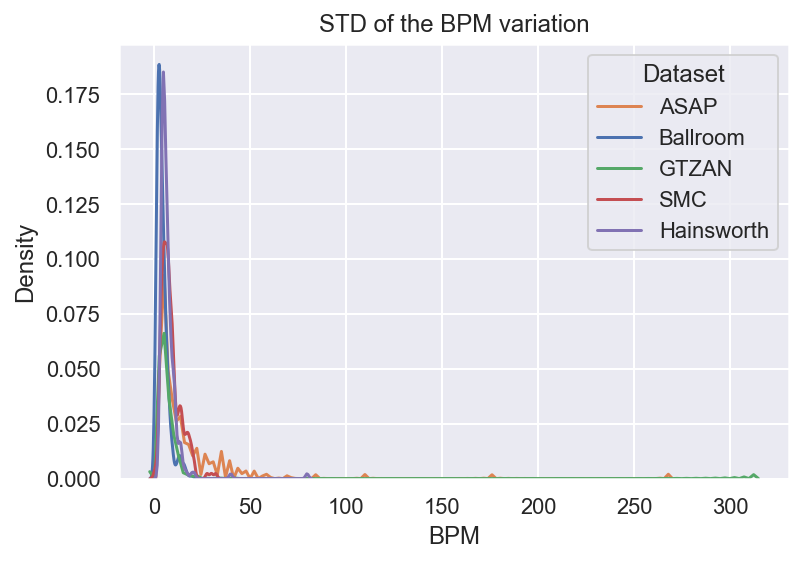

In [36]:
sns.set()

trunc = False

asap_bpm_deviation = []
for i,row in all_df.loc[all_df["manually_corrected"] & all_df["has_single_ts"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performance_annotations"]))
    bpm= 60/ibis
    bpm_deviation = np.diff(bpm)
    std = np.std(bpm_deviation)
    if not trunc:
        asap_bpm_deviation.append(std)
    elif std<60:
        asap_bpm_deviation.append(std)

ballroom_bpm_deviation = get_bpm_deviation('ballroom',truncate=trunc )
smc_bpm_deviation = get_bpm_deviation('smc',truncate=trunc)
gtzan_bpm_deviation = get_bpm_deviation('gtzan',truncate=trunc)  
hainsworth_bpm_deviation = get_bpm_deviation_hainsworth(truncate=trunc)


palette= sns.color_palette()

sns.kdeplot(asap_bpm_deviation,bw=0.8,color=palette[1],label = "ASAP")
# sns.distplot(ballroom_bpm_deviation, norm_hist= True,kde=False, label= "Ballroom", hist = True, bins=50,color=palette[0])
sns.kdeplot(ballroom_bpm_deviation,bw=0.8,color=palette[0],label= "Ballroom")
# ax  = sns.distplot(asap_bpm_deviation,norm_hist= True,kde=False, label = "ASAP", hist = True, bins = 100 ,color=palette[1])
sns.kdeplot(gtzan_bpm_deviation,bw=0.8,color=palette[2],label = "GTZAN")
sns.kdeplot(smc_bpm_deviation,bw=0.8,color=palette[3], label = "SMC")
sns.kdeplot(hainsworth_bpm_deviation,bw=0.8,color=palette[4], label = "Hainsworth")

# ax.set(xlim= (-5,50))
# ax.set(xlabel='BPM', ylabel='Density function', title="STD of the BPM variation")
plt.legend(title = 'Dataset')
plt.title('STD of the BPM variation')
plt.xlabel('BPM')
plt.ylabel('Density')
# plt.xlim(0)

In [17]:
sns.set()

asap_bpm_deviation = []
for i,row in all_df.loc[all_df["manually_corrected"] & all_df["has_single_ts"]].iterrows():
# for i,row in all_df.loc[all_df["has_single_ts"]].iterrows():
    ibis = np.diff(get_beats(row["performance_annotations"]))
    bpm= 60/ibis
    bpm_deviation = np.diff(bpm)
    std = np.std(bpm_deviation)
    if std<60:
        asap_bpm_deviation.append(std)

trunc = False
ballroom_bpm_deviation = get_bpm_deviation('ballroom',truncate=trunc )
smc_bpm_deviation = get_bpm_deviation('smc',truncate=trunc)
gtzan_bpm_deviation = get_bpm_deviation('gtzan',truncate=trunc)  
hainsworth_bpm_deviation = get_bpm_deviation_hainsworth(truncate=trunc)


palette= sns.color_palette()

fig, ax = plt.subplots()
ax.set_xlim(0,50)

sns.kdeplot(asap_bpm_deviation,bw=0.8,color=palette[1],label = "ASAP",cumulative = True, ax=ax)
# sns.distplot(ballroom_bpm_deviation, norm_hist= True,kde=False, label= "Ballroom", hist = True, bins=50,color=palette[0])
sns.kdeplot(ballroom_bpm_deviation,bw=0.8,color=palette[0],label= "Ballroom",cumulative = True, ax=ax)
ax.hlines(1, 22,50,color=palette[0] )
# ax  = sns.distplot(asap_bpm_deviation,norm_hist= True,kde=False, label = "ASAP", hist = True, bins = 100 ,color=palette[1])
sns.kdeplot(smc_bpm_deviation,bw=0.8,color=palette[3], label = "SMC",cumulative = True, ax=ax)
ax = sns.kdeplot(hainsworth_bpm_deviation,bw=0.8,color=palette[4], label = "Hainsworth",cumulative = True, ax=ax)
sns.kdeplot(gtzan_bpm_deviation,bw=0.8,color=palette[2],label = "GTZAN",cumulative = True, ax=ax)


# ax.set(xlabel='BPM', ylabel='Density function', title="STD of the BPM variation")
plt.legend(title = 'Dataset')
# plt.title('Cumulative distribution of the STD of the BPM variation')
plt.xlabel('$\sigma(\Delta_{BPM})$')
plt.ylabel('Probability')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fosca\\Desktop\\CNAM\\dataset paper\\Other datasets/ballroom.pkl'

In [21]:
with open(Path('../asap_annotations.json')) as json_file:
    data = json.load(json_file)

all_df = pd.read_csv(Path(BASE_PATH,"metadata.csv"))

In [22]:
def bpm_variation(row):
    ibis = np.diff(data[row["midi_performance"]]["performance_beats"])
    bpm= 60/ibis
    bpm_deviation = np.diff(bpm)
    bpm_deviation = bpm_deviation[bpm_deviation<60] 
    std = np.std(bpm_deviation)
    return std

def bpm_variation2(row):
    ibis = np.diff(data[row["midi_performance"]]["performance_beats"])
    bpm= 60/ibis
#     bpm_deviation = np.diff(bpm)
#     bpm_deviation = bpm_deviation[bpm_deviation<60] 
    std = np.std(bpm)
    return std

def manually_checked(row):
    return data[row["midi_performance"]]["manually_checked"]

def time_signatures(row):
    return data[row["midi_performance"]]["perf_time_signatures"]
    

In [23]:
all_df = pd.read_csv(Path(BASE_PATH,"metadata.csv"))
    
all_df

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance
0,Bach,Fugue_bwv_846,Bach/Fugue/bwv_846,Bach/Fugue/bwv_846/xml_score.musicxml,Bach/Fugue/bwv_846/midi_score.mid,Bach/Fugue/bwv_846/Shi05M.mid,Bach/Fugue/bwv_846/Shi05M_annotations.txt,Bach/Fugue/bwv_846/midi_score_annotations.txt,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,144.567708,NaN,Bach/Fugue/bwv_846/Shi05M.wav
1,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Denisova06M.mid,Bach/Fugue/bwv_848/Denisova06M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,69.317708,NaN,Bach/Fugue/bwv_848/Denisova06M.wav
2,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lee01M.mid,Bach/Fugue/bwv_848/Lee01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,74.795573,NaN,Bach/Fugue/bwv_848/Lee01M.wav
3,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/LeeSH01M.mid,Bach/Fugue/bwv_848/LeeSH01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,83.644792,NaN,Bach/Fugue/bwv_848/LeeSH01M.wav
4,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lin04M.mid,Bach/Fugue/bwv_848/Lin04M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,75.373698,NaN,Bach/Fugue/bwv_848/Lin04M.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Na03.mid,Scriabin/Sonatas/5/Na03_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN
1064,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Na07M.mid,Scriabin/Sonatas/5/Na07M_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,NaN,NaN,Scriabin/Sonatas/5/Na07M.wav
1065,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/TET02.mid,Scriabin/Sonatas/5/TET02_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN
1066,Scriabin,Sonatas_5,Scriabin/Sonatas/5,Scriabin/Sonatas/5/xml_score.musicxml,Scriabin/Sonatas/5/midi_score.mid,Scriabin/Sonatas/5/Yeletskiy02.mid,Scriabin/Sonatas/5/Yeletskiy02_annotations.txt,Scriabin/Sonatas/5/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN


In [6]:
all_df[all_df.maestro_midi_performance.notna()].count()

composer                     520
title                        520
folder                       520
xml_score                    520
midi_score                   520
midi_performance             520
performance_annotations      520
midi_score_annotations       520
maestro_midi_performance     520
maestro_audio_performance    520
start                        114
end                          131
audio_performance            520
dtype: int64

In [24]:
with open(Path('../asap_annotations.json')) as json_file:
    data = json.load(json_file)

all_df = pd.read_csv(Path(BASE_PATH,"metadata.csv"))

all_df["bpm_variation"] = all_df.apply(bpm_variation,axis=1)
all_df["manually_checked"] = all_df.apply(manually_checked,axis=1)
all_df["time_signatures"] = all_df.apply(time_signatures,axis=1)

# all_df = all_df.loc[(all_df.time_signatures.map(len)==1) & (all_df.bpm_variation < 60)]
# all_df = all_df.loc[(all_df.bpm_variation < 60)]

In [25]:
all_df.sort_values(by="bpm_variation")

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance,bpm_variation,manually_checked,time_signatures
152,Bach,Prelude_bwv_885,Bach/Prelude/bwv_885,Bach/Prelude/bwv_885/xml_score.musicxml,Bach/Prelude/bwv_885/midi_score.mid,Bach/Prelude/bwv_885/SINKEV01.mid,Bach/Prelude/bwv_885/SINKEV01_annotations.txt,Bach/Prelude/bwv_885/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN,1.041770,True,"{'2.05022': ['4/4', 4]}"
153,Bach,Prelude_bwv_885,Bach/Prelude/bwv_885,Bach/Prelude/bwv_885/xml_score.musicxml,Bach/Prelude/bwv_885/midi_score.mid,Bach/Prelude/bwv_885/SINKEV06.mid,Bach/Prelude/bwv_885/SINKEV06_annotations.txt,Bach/Prelude/bwv_885/midi_score_annotations.txt,{maestro}/2004/MIDI-Unprocessed_SMF_17_R1_2004...,{maestro}/2004/MIDI-Unprocessed_SMF_17_R1_2004...,NaN,165.207292,Bach/Prelude/bwv_885/SINKEV06.wav,1.357186,True,"{'2.10363': ['4/4', 4]}"
48,Bach,Fugue_bwv_874,Bach/Fugue/bwv_874,Bach/Fugue/bwv_874/xml_score.musicxml,Bach/Fugue/bwv_874/midi_score.mid,Bach/Fugue/bwv_874/Kurz01M.mid,Bach/Fugue/bwv_874/Kurz01M_annotations.txt,Bach/Fugue/bwv_874/midi_score_annotations.txt,{maestro}/2011/MIDI-Unprocessed_01_R1_2011_MID...,{maestro}/2011/MIDI-Unprocessed_01_R1_2011_MID...,NaN,NaN,Bach/Fugue/bwv_874/Kurz01M.wav,1.574524,True,"{'4.240885': ['2/2', 2]}"
150,Bach,Prelude_bwv_885,Bach/Prelude/bwv_885,Bach/Prelude/bwv_885/xml_score.musicxml,Bach/Prelude/bwv_885/midi_score.mid,Bach/Prelude/bwv_885/Huang04M.mid,Bach/Prelude/bwv_885/Huang04M_annotations.txt,Bach/Prelude/bwv_885/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_04_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_04_R1_2008_01-...,NaN,158.566406,Bach/Prelude/bwv_885/Huang04M.wav,1.594343,True,"{'1.049479': ['4/4', 4]}"
276,Beethoven,Piano_Sonatas_21-2,Beethoven/Piano_Sonatas/21-2,Beethoven/Piano_Sonatas/21-2/xml_score.musicxml,Beethoven/Piano_Sonatas/21-2/midi_score.mid,Beethoven/Piano_Sonatas/21-2/YOO05M.mid,Beethoven/Piano_Sonatas/21-2/YOO05M_annotation...,Beethoven/Piano_Sonatas/21-2/midi_score_annota...,{maestro}/2004/MIDI-Unprocessed_SMF_22_R1_2004...,{maestro}/2004/MIDI-Unprocessed_SMF_22_R1_2004...,NaN,245.493750,Beethoven/Piano_Sonatas/21-2/YOO05M.wav,1.617843,False,"{'1.003125': ['6/8', 2]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Beethoven,Piano_Sonatas_32-1,Beethoven/Piano_Sonatas/32-1,Beethoven/Piano_Sonatas/32-1/xml_score.musicxml,Beethoven/Piano_Sonatas/32-1/midi_score.mid,Beethoven/Piano_Sonatas/32-1/Park01.mid,Beethoven/Piano_Sonatas/32-1/Park01_annotation...,Beethoven/Piano_Sonatas/32-1/midi_score_annota...,NaN,NaN,NaN,NaN,NaN,627.094042,False,"{'2.1534435000000003': ['4/4', 4]}"
330,Beethoven,Piano_Sonatas_26-3,Beethoven/Piano_Sonatas/26-3,Beethoven/Piano_Sonatas/26-3/xml_score.musicxml,Beethoven/Piano_Sonatas/26-3/midi_score.mid,Beethoven/Piano_Sonatas/26-3/Tysman01.mid,Beethoven/Piano_Sonatas/26-3/Tysman01_annotati...,Beethoven/Piano_Sonatas/26-3/midi_score_annota...,NaN,NaN,NaN,NaN,NaN,665.852220,False,"{'0.419872': ['6/8', 2]}"
299,Beethoven,Piano_Sonatas_23-1,Beethoven/Piano_Sonatas/23-1,Beethoven/Piano_Sonatas/23-1/xml_score.musicxml,Beethoven/Piano_Sonatas/23-1/midi_score.mid,Beethoven/Piano_Sonatas/23-1/Yi02M.mid,Beethoven/Piano_Sonatas/23-1/Yi02M_annotations...,Beethoven/Piano_Sonatas/23-1/midi_score_annota...,{maestro}/2011/MIDI-Unprocessed_21_R1_2011_MID...,{maestro}/2011/MIDI-Unprocessed_21_R1_2011_MID...,NaN,NaN,Beethoven/Piano_Sonatas/23-1/Yi02M.wav,949.910207,False,"{'1.7506509999999995': ['12/8', 4]}"
853,Liszt,Mephisto_Waltz,Liszt/Mephisto_Waltz,Liszt/Mephisto_Waltz/xml_score.musicxml,Liszt/Mephisto_Waltz/midi_score.mid,Liszt/Mephisto_Waltz/HSU04.mid,Liszt/Mephisto_Waltz/HSU04_annotations.txt,Liszt/Mephisto_Waltz/midi_score_annotations.txt,NaN,NaN,NaN,NaN,NaN,1527.750542,False,"{'2.049138': ['3/8', 3], '434.5510685': ['2/4'..."


In [ ]:
all_df = all_df.loc[(all_df.time_signatures.map(len)==1) ]

In [56]:
all_df.mean()

start               269.854435
end                 166.338285
bpm_variation        15.528572
manually_checked      0.351990
dtype: float64

[Text(0, 0.5, '$\\sigma(\\Delta_{BPM})$'), Text(0.5, 0, '')]

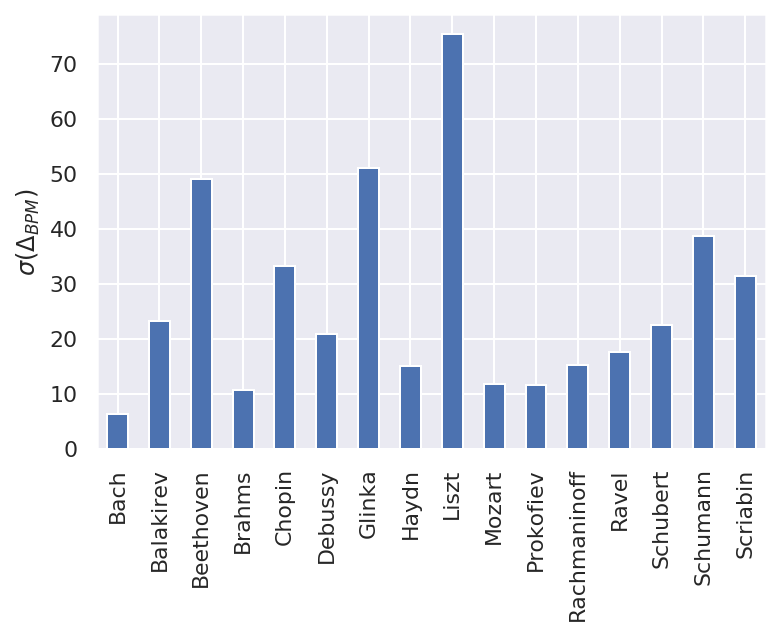

In [26]:
sns.set()
ax = all_df.groupby(['composer'],as_index=False).mean().plot.bar(x='composer', y='bpm_variation', legend=False)
ax.set(xlabel='', ylabel='$\sigma(\Delta_{BPM})$')


In [11]:
trunc = False
ballroom_bpm_deviation = get_bpm_deviation('ballroom',truncate=trunc )
smc_bpm_deviation = get_bpm_deviation('smc',truncate=trunc)
gtzan_bpm_deviation = get_bpm_deviation('gtzan',truncate=trunc)  
hainsworth_bpm_deviation = get_bpm_deviation_hainsworth(truncate=trunc)
print(np.mean(ballroom_bpm_deviation))
print(np.mean(smc_bpm_deviation))

NameError: name 'get_bpm_deviation' is not defined

In [10]:
data = [['ASAP',15.528572],['Ballroom', float(np.mean(ballroom_bpm_deviation))], ['SMC', float(np.mean(smc_bpm_deviation))], ['GTZAN', float(np.mean(gtzan_bpm_deviation))], ['Hainsworth',float(np.mean(hainsworth_bpm_deviation))]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['dataset', 'standard deviation of BPM variation'])

NameError: name 'ballroom_bpm_deviation' is not defined

In [9]:
ax = df.plot.bar(x='dataset', y='standard deviation of BPM variation', legend=False)
ax.set(xlabel='', ylabel='BPM')

NameError: name 'df' is not defined

In [194]:
all_df.loc[all_df.start.notna() | all_df.end.notna()]

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance,bpm_variation,manually_checked,time_signatures
0,Bach,Fugue_bwv_846,Bach/Fugue/bwv_846,Bach/Fugue/bwv_846/xml_score.musicxml,Bach/Fugue/bwv_846/midi_score.mid,Bach/Fugue/bwv_846/Shi05M.mid,Bach/Fugue/bwv_846/Shi05M_annotations.txt,Bach/Fugue/bwv_846/midi_score_annotations.txt,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,144.567708,NaN,Bach/Fugue/bwv_846/Shi05M.wav,5.233079,True,"{'4.924479': ['4/4', 4]}"
1,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Denisova06M.mid,Bach/Fugue/bwv_848/Denisova06M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_02_R1_2008_01-...,69.317708,NaN,Bach/Fugue/bwv_848/Denisova06M.wav,7.049791,True,"{'1.9335939999999998': ['4/4', 4]}"
2,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lee01M.mid,Bach/Fugue/bwv_848/Lee01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,{maestro}/2011/MIDI-Unprocessed_08_R1_2011_MID...,74.795573,NaN,Bach/Fugue/bwv_848/Lee01M.wav,5.748788,True,"{'2.085938': ['4/4', 4]}"
3,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/LeeSH01M.mid,Bach/Fugue/bwv_848/LeeSH01M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,{maestro}/2017/MIDI-Unprocessed_049_PIANO049_M...,83.644792,NaN,Bach/Fugue/bwv_848/LeeSH01M.wav,5.809242,True,"{'2.229167': ['4/4', 4]}"
4,Bach,Fugue_bwv_848,Bach/Fugue/bwv_848,Bach/Fugue/bwv_848/xml_score.musicxml,Bach/Fugue/bwv_848/midi_score.mid,Bach/Fugue/bwv_848/Lin04M.mid,Bach/Fugue/bwv_848/Lin04M_annotations.txt,Bach/Fugue/bwv_848/midi_score_annotations.txt,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,{maestro}/2008/MIDI-Unprocessed_10_R1_2008_01-...,75.373698,NaN,Bach/Fugue/bwv_848/Lin04M.wav,5.549035,True,"{'1.9726560000000002': ['4/4', 4]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,Schumann,Kreisleriana_1,Schumann/Kreisleriana/1_no_first_repeat,Schumann/Kreisleriana/1_no_first_repeat/xml_sc...,Schumann/Kreisleriana/1_no_first_repeat/midi_s...,Schumann/Kreisleriana/1_no_first_repeat/Johann...,Schumann/Kreisleriana/1_no_first_repeat/Johann...,Schumann/Kreisleriana/1_no_first_repeat/midi_s...,{maestro}/2014/MIDI-UNPROCESSED_11-13_R1_2014_...,{maestro}/2014/MIDI-UNPROCESSED_11-13_R1_2014_...,NaN,121.617188,Schumann/Kreisleriana/1_no_first_repeat/Johann...,20.261312,True,"{'1.2421879999999998': ['2/4', 2]}"
1050,Schumann,Toccata,Schumann/Toccata,Schumann/Toccata/xml_score.musicxml,Schumann/Toccata/midi_score.mid,Schumann/Toccata/BENABD10.mid,Schumann/Toccata/BENABD10_annotations.txt,Schumann/Toccata/midi_score_annotations.txt,NaN,NaN,NaN,4.163542,NaN,11.988518,True,"{'2.806621': ['2/4', 2]}"
1054,Schumann,Toccata_repeat,Schumann/Toccata_repeat,Schumann/Toccata_repeat/xml_score.musicxml,Schumann/Toccata_repeat/midi_score.mid,Schumann/Toccata_repeat/Zhdanov06.mid,Schumann/Toccata_repeat/Zhdanov06_annotations.txt,Schumann/Toccata_repeat/midi_score_annotations...,NaN,NaN,NaN,4.347656,NaN,18.914101,False,"{'1.50908': ['2/4', 2]}"
1056,Scriabin,Etudes_op_8_11,Scriabin/Etudes_op_8/11,Scriabin/Etudes_op_8/11/xml_score.musicxml,Scriabin/Etudes_op_8/11/midi_score.mid,Scriabin/Etudes_op_8/11/Shi08M.mid,Scriabin/Etudes_op_8/11/Shi08M_annotations.txt,Scriabin/Etudes_op_8/11/midi_score_annotations...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,{maestro}/2006/MIDI-Unprocessed_19_R1_2006_01-...,263.294271,NaN,Scriabin/Etudes_op_8/11/Shi08M.wa

In [69]:
for i, row in all_df.drop_duplicates(subset=["title","composer"]).groupby('title').count().iterrows():
    if row["composer"]>1:
        print(i,row["composer"])

Piano_Sonatas_11-3 2
Piano_Sonatas_12-1 2
Piano_Sonatas_8-1 2
Toccata 2


In [73]:
all_df[all_df.title =="Piano_Sonatas_8-1" ]

,composer,title,folder,xml_score,midi_score,midi_performance,performance_annotations,midi_score_annotations,maestro_midi_performance,maestro_audio_performance,start,end,audio_performance,bpm_variation,manually_checked,time_signatures
443,Beethoven,Piano_Sonatas_8-1,Beethoven/Piano_Sonatas/8-1,Beethoven/Piano_Sonatas/8-1/xml_score.musicxml,Beethoven/Piano_Sonatas/8-1/midi_score.mid,Beethoven/Piano_Sonatas/8-1/ChenS01.mid,Beethoven/Piano_Sonatas/8-1/ChenS01_annotation...,Beethoven/Piano_Sonatas/8-1/midi_score_annotat...,NaN,NaN,NaN,NaN,NaN,13.395251,True,"{'2.020564': ['4/4', 4], '102.43446': ['2/2', ..."
444,Beethoven,Piano_Sonatas_8-1,Beethoven/Piano_Sonatas/8-1,Beethoven/Piano_Sonatas/8-1/xml_score.musicxml,Beethoven/Piano_Sonatas/8-1/midi_score.mid,Beethoven/Piano_Sonatas/8-1/Na06M.mid,Beethoven/Piano_Sonatas/8-1/Na06M_annotations.txt,Beethoven/Piano_Sonatas/8-1/midi_score_annotat...,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,{maestro}/2009/MIDI-Unprocessed_09_R1_2009_01-...,NaN,362.460938,Beethoven/Piano_Sonatas/8-1/Na06M.wav,12.680891,True,"{'0.964844': ['4/4', 4], '83.859375': ['2/2', ..."
922,Mozart,Piano_Sonatas_8-1,Mozart/Piano_Sonatas/8-1,Mozart/Piano_Sonatas/8-1/xml_score.musicxml,Mozart/Piano_Sonatas/8-1/midi_score.mid,Mozart/Piano_Sonatas/8-1/Bogdanovitch01.mid,Mozart/Piano_Sonatas/8-1/Bogdanovitch01_annota...,Mozart/Piano_Sonatas/8-1/midi_score_annotation...,NaN,NaN,NaN,NaN,NaN,12.184574,False,"{'2.063299': ['4/4', 4]}"
923,Mozart,Piano_Sonatas_8-1,Mozart/Piano_Sonatas/8-1,Mozart/Piano_Sonatas/8-1/xml_score.musicxml,Mozart/Piano_Sonatas/8-1/midi_score.mid,Mozart/Piano_Sonatas/8-1/Jia01.mid,Mozart/Piano_Sonatas/8-1/Jia01_annotations.txt,Mozart/Piano_Sonatas/8-1/midi_score_annotation...,NaN,NaN,NaN,NaN,NaN,13.052972,False,"{'1.596553': ['4/4', 4]}"
924,Mozart,Piano_Sonatas_8-1,Mozart/Piano_Sonatas/8-1,Mozart/Piano_Sonatas/8-1/xml_score.musicxml,Mozart/Piano_Sonatas/8-1/midi_score.mid,Mozart/Piano_Sonatas/8-1/LEE_J03.mid,Mozart/Piano_Sonatas/8-1/LEE_J03_annotations.txt,Mozart/Piano_Sonatas/8-1/midi_score_annotation...,NaN,NaN,NaN,NaN,NaN,12.721788,False,"{'2.128737': ['4/4', 4]}"
925,Mozart,Piano_Sonatas_8-1,Mozart/Piano_Sonatas/8-1,Mozart/Piano_Sonatas/8-1/xml_score.musicxml,Mozart/Piano_Sonatas/8-1/midi_score.mid,Mozart/Piano_Sonatas/8-1/Lo01.mid,Mozart/Piano_Sonatas/8-1/Lo01_annotations.txt,Mozart/Piano_Sonatas/8-1/midi_score_annotation...,NaN,NaN,NaN,NaN,NaN,9.508292,False,"{'1.523102': ['4/4', 4]}"
926,Mozart,Piano_Sonatas_8-1,Mozart/Piano_Sonatas/8-1,Mozart/Piano_Sonatas/8-1/xml_score.musicxml,Mozart/Piano_Sonatas/8-1/midi_score.mid,Mozart/Piano_Sonatas/8-1/Rozanski02.mid,Mozart/Piano_Sonatas/8-1/Rozanski02_annotation...,Mozart/Piano_Sonatas/8-1/midi_score_annotation...,NaN,NaN,NaN,NaN,NaN,10.710354,False,"{'1.506409': ['4/4', 4]}"
